# Latihan PCA dan Clustering
Kita latihan membuat model PCA atau Clustering (bebas, pilih satu)

Gunakan dataset https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv yang diambil dari https://archive.ics.uci.edu/dataset/292/wholesale+customers

yang adalah tentang wholesale customer, ada kolom:
- channel (cat)
- region (cat)
- fresh (int)
- milk (int)
- grocery (int)
- frozen (int)
- detergents_paper (int)
- delicassen (int)

masing masing kolom artinya adalah hasil penjualan per tahun untuk seorang customer dalam kategori tertentu:
1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

lalu yang ini adalah jenis dan lokasi customer
7)	CHANNEL: customers - Horeca (Hotel/Restaurant/Cafe) or Retail (Nominal)
8)	REGION: customers - Lisnon, Oporto or Other (Nominal)

Descriptive Statistics:   
(Minimum, Maximum, Mean, Std. Deviation)   
FRESH (	3, 112151, 12000.30, 12647.329)   
MILK	(55, 73498, 5796.27, 7380.377)   
GROCERY	(3, 92780, 7951.28, 9503.163)   
FROZEN	(25, 60869, 3071.93, 4854.673)   
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)   
DELICATESSEN (3, 47943, 1524.87, 2820.106)   

REGION	Frequency   
Lisbon	77   
Oporto	47   
Other Region	316   
Total	440   

CHANNEL	Frequency   
Horeca	298   
Retail	142   
Total	440   


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# import data

df_ws = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
df_ws.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df_ws.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

aku mau pisahkan channel dan region, tidak digunakan sebagai fitur

In [5]:
X = df_ws.drop(columns=['Channel', 'Region'])
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
# kita mau buat PCA

# scaling dulu
scaler = StandardScaler()
scaled_ws = scaler.fit_transform(X)

# latih model
model_pca = PCA()
pca_ws = model_pca.fit_transform(scaled_ws)

# masukin hasil PCA ke dataframe biar lebih mudah dibaca
col_names = []
for i in range(len(X.columns)):
    col_names.append("PC " + str(i+1))

df_pca_ws = pd.DataFrame(pca_ws, columns=col_names)
df_pca_ws

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825
...,...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781,0.869495
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026,-0.226535
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768,-0.085349
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215,-0.028943


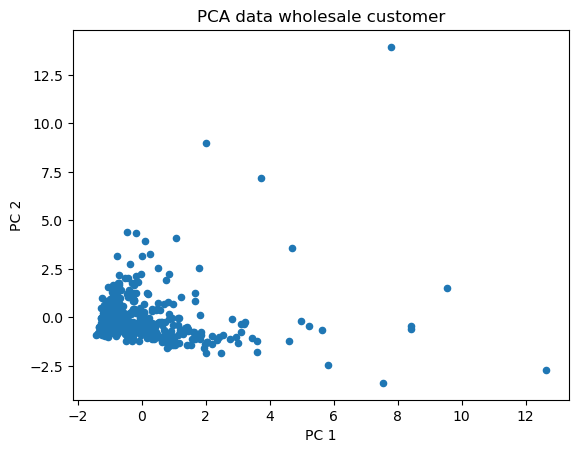

In [7]:
# membuat visualisasi data menggunakan PC 1 dan PC 2
df_pca_ws.plot(kind="scatter", x="PC 1", y="PC 2")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA data wholesale customer")
plt.show()

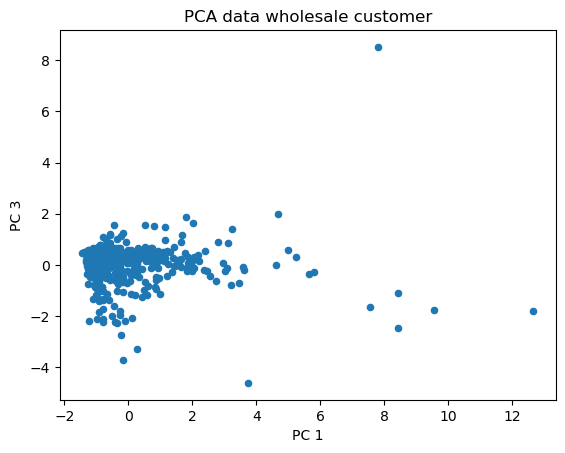

In [8]:
# membuat visualisasi data menggunakan PC 1 dan PC 3
df_pca_ws.plot(kind="scatter", x="PC 1", y="PC 3")

plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.title("PCA data wholesale customer")
plt.show()

Berikutnya, kita mau buat model clustering, untuk mengelompokkan customer wholesale kita

In [9]:
# buat model clustering
model_km = KMeans(n_clusters=8, random_state=0)
model_km.fit(X)

# masukkan hasil clustering ke dataframe
df_ws_clustered = df_ws.copy()
df_ws_clustered['cluster'] = model_km.predict(X)

# lihat hasil clustering
df_ws_clustered

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,7
4,2,3,22615,5410,7198,3915,1777,5185,7
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [10]:
# descriptive statistics per cluster
for i in range(8):
    data_grup = df_ws_clustered[df_ws_clustered['cluster'] == i]
    print("Cluster " + str(i))
    display(data_grup.describe())
    print()

Cluster 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0
mean,1.053254,2.508876,5868.733728,2414.248521,2900.686391,2957.733728,682.366864,868.313609,0.0
std,0.225208,0.795211,3642.117886,1920.394828,1841.892422,4107.891274,895.751724,867.218310,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,47.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,2647.000000,1012.000000,1563.000000,779.000000,179.000000,314.000000,0.0
50%,1.000000,3.000000,5963.000000,1882.000000,2368.000000,1517.000000,311.000000,654.000000,0.0
75%,1.000000,3.000000,8885.000000,3294.000000,3828.000000,3570.000000,825.000000,1114.000000,0.0
max,2.000000,3.000000,12434.000000,10678.000000,7854.000000,35009.000000,4762.000000,5137.000000,0.0



Cluster 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,1.947368,2.368421,6264.894737,17153.578947,24637.763158,2132.868421,10733.236842,2420.973684,1.0
std,0.226294,0.851741,5970.989265,6842.525662,7071.487085,2062.378293,5236.918386,2932.595368,0.0
min,1.000000,1.000000,85.000000,6964.000000,13567.000000,33.000000,282.000000,3.000000,1.0
25%,2.000000,2.000000,1764.000000,12705.000000,19993.250000,806.250000,7404.250000,715.250000,1.0
50%,2.000000,3.000000,5074.000000,15184.500000,23361.500000,1704.000000,10768.000000,1497.500000,1.0
75%,2.000000,3.000000,8739.000000,21746.500000,28122.500000,2794.500000,13514.250000,3070.250000,1.0
max,2.000000,3.000000,26373.000000,36423.000000,45828.000000,10155.000000,24231.000000,16523.000000,1.0



Cluster 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,1.103448,2.620690,37133.206897,4963.655172,5604.931034,4418.620690,812.068966,2048.620690,2.0
std,0.309934,0.775232,6762.295296,4195.521152,4068.424738,4599.905282,904.766147,2638.514157,0.0
min,1.000000,1.000000,29526.000000,286.000000,471.000000,287.000000,20.000000,3.000000,2.0
25%,1.000000,3.000000,31012.000000,1917.000000,2648.000000,1200.000000,182.000000,823.000000,2.0
50%,1.000000,3.000000,36817.000000,3944.000000,4955.000000,3012.000000,439.000000,1440.000000,2.0
75%,1.000000,3.000000,42312.000000,7152.000000,7336.000000,5970.000000,1041.000000,2253.000000,2.0
max,2.000000,3.000000,53205.000000,16687.000000,16966.000000,18711.000000,3881.000000,14351.000000,2.0



Cluster 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,5.0,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.0
mean,2.0,2.800000,25603.000000,43460.600000,61472.20000,2636.000000,29974.200000,2708.80000,3.0
std,0.0,0.447214,14578.726059,25164.556887,21876.69411,3100.385702,9032.283028,2243.61855,0.0
min,2.0,2.000000,8565.000000,4980.000000,32114.00000,131.000000,20070.000000,903.00000,3.0
25%,2.0,3.000000,16117.000000,38369.000000,55571.00000,987.000000,24171.000000,1215.00000,3.0
50%,2.0,3.000000,22925.000000,46197.000000,59598.00000,1026.000000,26701.000000,2017.00000,3.0
75%,2.0,3.000000,35942.000000,54259.000000,67298.00000,3254.000000,38102.000000,2944.00000,3.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.00000,3.0



Cluster 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,1.758621,2.620690,4309.448276,7726.597701,11725.057471,1273.724138,5093.367816,1391.655172,4.0
std,0.430400,0.735185,3849.341396,3128.681112,3937.627890,1394.152445,2529.539801,1307.416135,0.0
min,1.000000,1.000000,18.000000,1275.000000,1660.000000,25.000000,93.000000,3.000000,4.0
25%,2.000000,3.000000,1046.500000,5495.000000,9257.500000,325.000000,3526.500000,363.500000,4.0
50%,2.000000,3.000000,3087.000000,7603.000000,11055.000000,824.000000,4666.000000,1265.000000,4.0
75%,2.000000,3.000000,6277.500000,9598.000000,14116.000000,1644.000000,6734.000000,1847.000000,4.0
max,2.000000,3.000000,15168.000000,18664.000000,22272.000000,6269.000000,17120.000000,7844.000000,4.0



Cluster 5


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,1.0,2.666667,70943.833333,7688.833333,8298.500000,12737.833333,1483.166667,3434.833333,5.0
std,0.0,0.816497,21864.717409,10844.130586,6484.233054,4944.245480,1744.794133,2635.059044,0.0
min,1.0,1.000000,56082.000000,555.000000,902.000000,6422.000000,212.000000,918.000000,5.0
25%,1.0,3.000000,56102.000000,3480.750000,3368.500000,9019.500000,735.250000,2429.000000,5.0
50%,1.0,3.000000,62555.000000,3957.500000,8004.000000,13270.000000,764.500000,2707.000000,5.0
75%,1.0,3.000000,74415.500000,4525.000000,11683.250000,16693.250000,1304.500000,3219.750000,5.0
max,1.0,3.000000,112151.000000,29627.000000,18148.000000,18028.000000,4948.000000,8550.000000,5.0



Cluster 6


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,2.0,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.0
mean,1.0,2.500000,34782.000000,30367.000000,16898.000000,48701.50000,755.500000,26776.000000,6.0
std,0.0,0.707107,2920.351006,19209.262818,4627.306776,17207.44352,730.441305,29934.658475,0.0
min,1.0,2.000000,32717.000000,16784.000000,13626.000000,36534.00000,239.000000,5609.000000,6.0
25%,1.0,2.250000,33749.500000,23575.500000,15262.000000,42617.75000,497.250000,16192.500000,6.0
50%,1.0,2.500000,34782.000000,30367.000000,16898.000000,48701.50000,755.500000,26776.000000,6.0
75%,1.0,2.750000,35814.500000,37158.500000,18534.000000,54785.25000,1013.750000,37359.500000,6.0
max,1.0,3.000000,36847.000000,43950.000000,20170.000000,60869.00000,1272.000000,47943.000000,6.0



Cluster 7


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0
mean,1.221154,2.557692,18992.519231,3367.144231,4793.653846,3315.192308,1131.923077,1577.038462,7.0
std,0.417034,0.761028,4302.823185,2455.888546,3781.180654,3171.692820,1378.394878,1807.921179,0.0
min,1.000000,1.000000,12126.000000,134.000000,3.000000,118.000000,3.000000,57.000000,7.0
25%,1.000000,2.000000,15654.000000,1371.750000,2037.750000,909.750000,241.000000,568.500000,7.0
50%,1.000000,3.000000,18258.500000,2766.000000,3444.500000,2247.500000,549.500000,1024.500000,7.0
75%,1.000000,3.000000,21748.000000,4776.500000,6653.500000,4344.750000,1475.250000,2106.000000,7.0
max,2.000000,3.000000,28257.000000,11487.000000,21042.000000,13223.000000,6707.000000,14472.000000,7.0


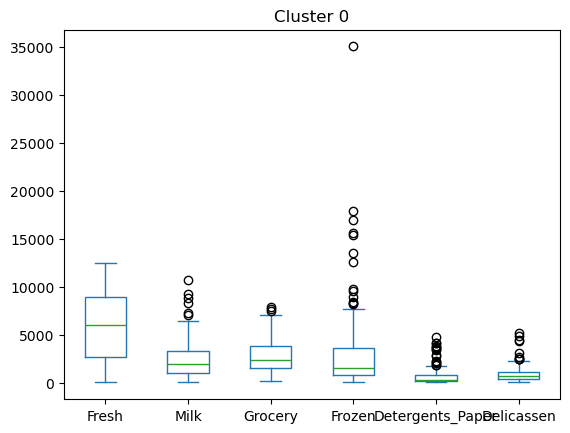

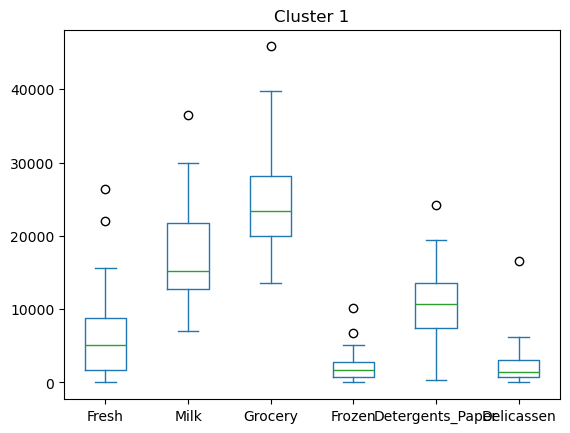

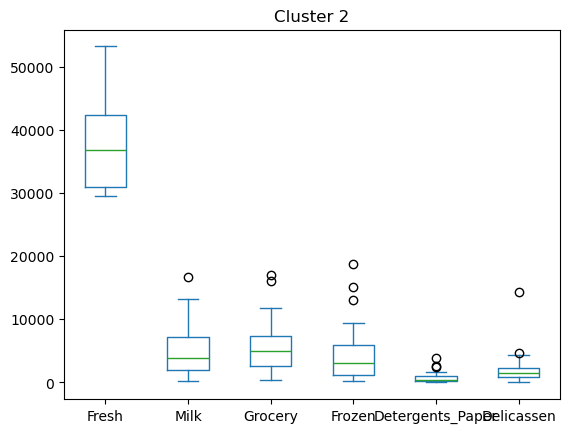

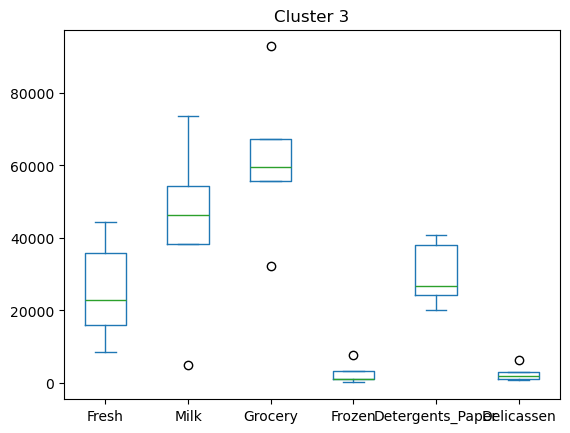

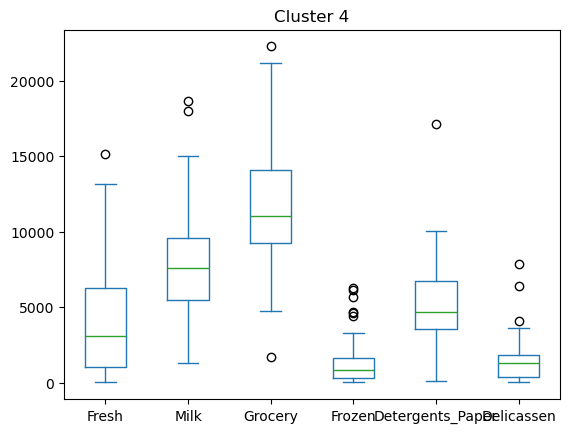

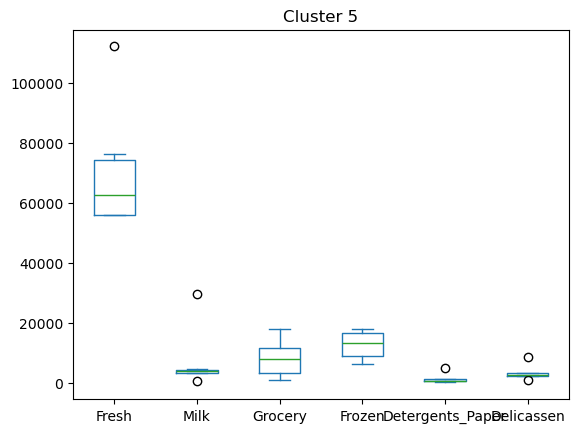

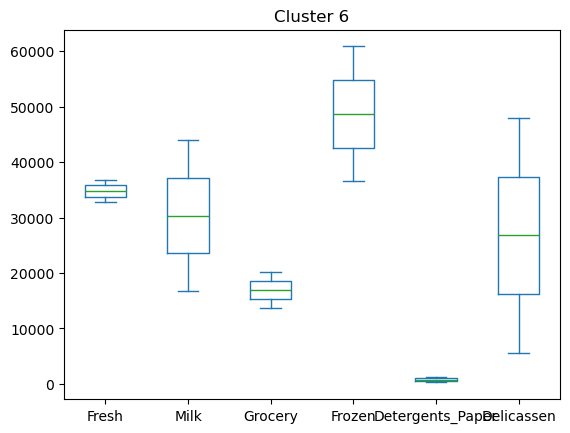

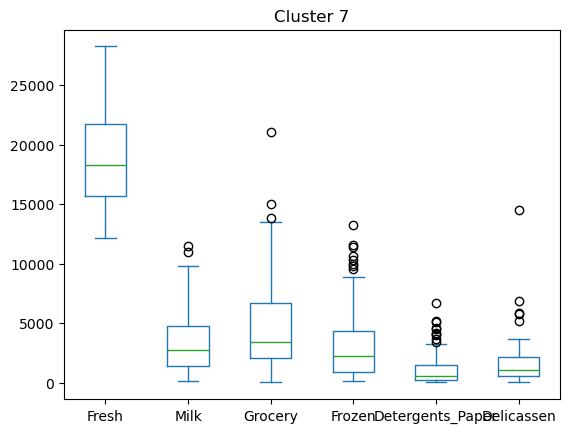

In [11]:
# boxplot per cluster
for i in range(8):
    data_grup = df_ws_clustered[df_ws_clustered['cluster'] == i]
    
    data_grup.drop(columns=["Channel", "Region", "cluster"]).plot(kind="box")
    plt.title("Cluster " + str(i))
    plt.show()


# Elbow Method
Sebaiknya sebelum mulai analisa, untuk clustering, kita gunakan elbow method untuk mengira-ngira jumlah K terbaik

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

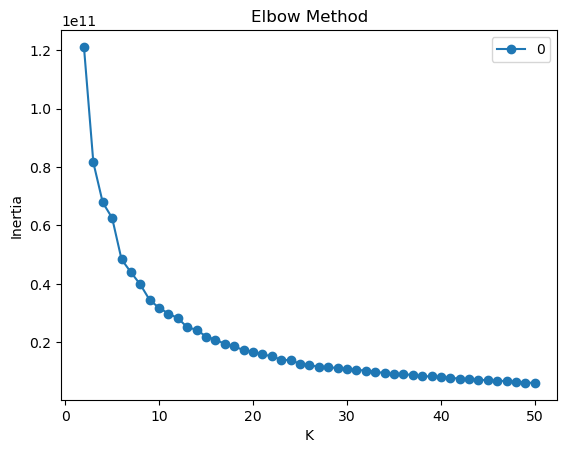

In [19]:
inertia_arr = []
k_list = range(2,51)

for k in k_list:
    model_km = KMeans(n_clusters=k, random_state=0, n_init=1)
    model_km.fit(X)

    inertia_arr.append(model_km.inertia_)

df_elbow = pd.DataFrame(index=k_list, data=inertia_arr)

df_elbow.plot(marker="o")

plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

dari elbow method diatas, kira kira berapa jumlah cluster optimal untuk data customer wholesale kita?

untuk warning memory leak, bisa setting environment variables windows seperti tutorial Shayan disini https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am 